In [39]:
# import json
import math

from matplotlib import pyplot as plt
from matplotlib import ticker as mtick

from graphical_grazer.graph import Graph

In [40]:
# Create a function that would return leading digit
def get_first_digit(num: int) -> int:
    digits = math.floor(math.log10(abs(num)))
    return int(num / pow(10, digits))

# Generate Collatz's Sequences

Here we generate the collatz conjecture sequences.

In [41]:
# Create value graph
values = []

# Let i go from 0 to 20,000 - 1
for i in range(1, 20_001):
    # Create a graph
    g = Graph()
    # Do recursive visit for a number i
    g.visit(i)
    # Convert all visited numbers into a list and add it to values
    values.append(list(g.vertices.keys()))

# -- IGNORE THIS LINE --
# This is to dump data as JSON, not required currently.
# json.dump(values, open("test001_2.json", "w"))

# Benford's Law Analysis

Here we analyze collatz sequence values with Benford's Law.


In [42]:
# Create a first-digit counter
counter = dict(((k, 0) for k in range(1, 10)))
# Keep the total of all values as 0
total = 0

for single_arr in values:
    if single_arr == [0]:
        continue
    for i in map(get_first_digit, single_arr):
        counter[i] += 1
        total += 1

# print(counter)

print(list(map(lambda i: (i, f"{counter[i] / total * 100:.2f}".format()), counter)))

[(1, '29.99'), (2, '17.24'), (3, '11.55'), (4, '11.78'), (5, '7.96'), (6, '5.48'), (7, '5.65'), (8, '5.53'), (9, '4.83')]


Text(0, 0.5, 'Frequency of numbers, normalized by total numbers')

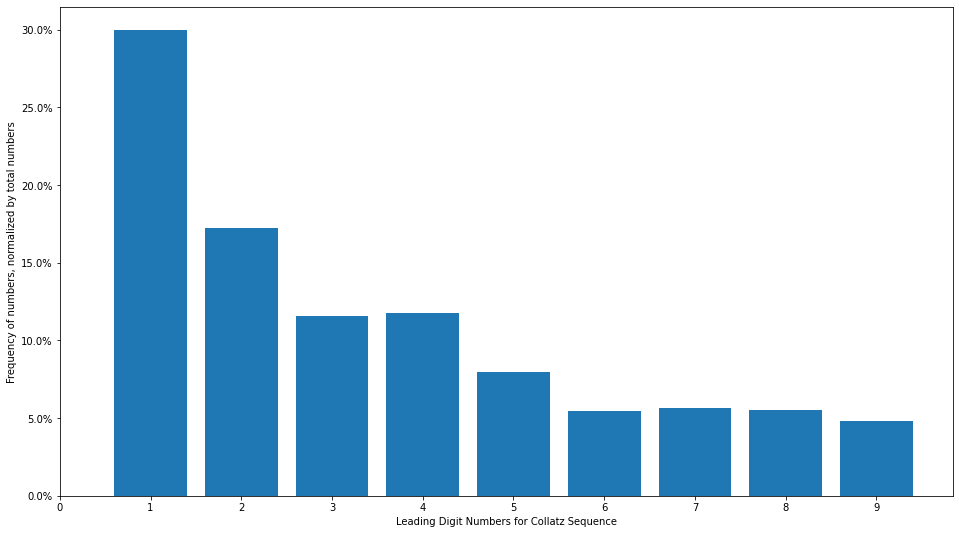

In [43]:
plt.figure(figsize=(16,9))

barfigure = plt.bar(counter.keys(), list(map(lambda x: x / total,counter.values())))

# Put Axes
axes = plt.gca()

axes.get_yaxis().set_major_formatter(mtick.PercentFormatter(1.0))

_ = axes.set_xticks(range(len(counter) + 1))

# Set Axes Labels
axes.set_xlabel("Leading Digit Numbers for Collatz Sequence")
axes.set_ylabel("Frequency of numbers, normalized by total numbers")